In [2]:
import numpy as np
import pandas as pd
import os
import csv
import cv2
from matplotlib import pyplot as plt
import joblib
from sklearn import preprocessing
from skimage.filters import sobel
from skimage.measure import shannon_entropy
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score


## SIFT

## Classification using SIFT  KNN

In [3]:
input_path = r"D:\Datasets\catsDogs\train"
temp = ['cat', 'dog']

In [6]:
#cleanup.clean('SIFT')
for animal_class in temp:
    count = 0
    for filename in os.listdir(os.path.join(input_path,animal_class)):
        img = cv2.imread(os.path.join(input_path,animal_class,filename))
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        #initialise sift descriptor
        sift = cv2.SIFT_create(nfeatures = 1000)
        keypoints, descriptors = sift.detectAndCompute(gray, None)

        sift_image = cv2.drawKeypoints(gray, keypoints, img)

        #convert the descriptor array into a dataframe format
        out=pd.DataFrame(descriptors)
        print("descriptor shape ",animal_class, count, " : ", out.shape)
        #append to the csv file

        csv_data=out.to_csv('output/Lab11_SIFT_' + animal_class + '.csv', mode='a', index=False)
        count += 1
        if count == 50:
            break
    print(animal_class + ": " + str(count))


descriptor shape  cat 0  :  (230, 128)
descriptor shape  cat 1  :  (237, 128)
descriptor shape  cat 2  :  (809, 128)


descriptor shape  cat 3  :  (880, 128)
descriptor shape  cat 4  :  (1001, 128)
descriptor shape  cat 5  :  (839, 128)
descriptor shape  cat 6  :  (852, 128)
descriptor shape  cat 7  :  (1000, 128)
descriptor shape  cat 8  :  (1000, 128)
descriptor shape  cat 9  :  (391, 128)
descriptor shape  cat 10  :  (197, 128)
descriptor shape  cat 11  :  (262, 128)
descriptor shape  cat 12  :  (811, 128)
descriptor shape  cat 13  :  (521, 128)
descriptor shape  cat 14  :  (100, 128)
descriptor shape  cat 15  :  (461, 128)
descriptor shape  cat 16  :  (1000, 128)
descriptor shape  cat 17  :  (488, 128)
descriptor shape  cat 18  :  (485, 128)
descriptor shape  cat 19  :  (323, 128)
descriptor shape  cat 20  :  (153, 128)
descriptor shape  cat 21  :  (704, 128)
descriptor shape  cat 22  :  (198, 128)
descriptor shape  cat 23  :  (1000, 128)
descriptor shape  cat 24  :  (730, 128)
descriptor shape  cat 25  :  (526, 128)
descriptor shape  cat 26  :  (132, 128)
descriptor shape  cat 27  :  (241, 128)
de

In [4]:
data1 = pd.read_csv('output\Lab11_SIFT_cat.csv', dtype='uint8')
data2 = pd.read_csv('output\Lab11_SIFT_dog.csv', dtype='uint8')

In [5]:
data1 = data1.astype('uint8')
data2 = data2.astype('uint8')

In [6]:
data1

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,1,0,0,0,1,1,1,3,0,0,...,10,66,102,15,1,0,0,0,5,64
1,3,1,1,4,55,27,13,13,1,2,...,14,22,23,0,0,0,20,4,0,5
2,0,0,1,1,0,0,0,0,1,17,...,22,3,31,6,7,15,118,70,16,16
3,50,7,7,10,8,15,8,43,18,3,...,1,32,21,6,2,59,43,2,0,2
4,5,4,8,50,84,1,0,5,16,83,...,3,22,37,53,18,3,2,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27820,38,102,5,0,0,6,16,13,34,181,...,1,13,121,11,1,4,11,2,0,3
27821,67,131,5,0,0,2,1,0,89,131,...,0,1,0,0,0,0,0,0,0,0
27822,0,4,116,116,35,0,0,0,2,9,...,0,7,58,35,5,0,0,0,0,13
27823,0,0,0,0,0,0,0,0,7,4,...,2,32,75,3,0,0,48,72,6,14


In [7]:
data2

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,15,15,73,40,10,6,29,74,29,122,...,0,0,0,0,0,1,2,0,0,0
1,1,0,0,3,11,0,0,1,7,1,...,9,14,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,8,3,116,39,...,65,25,23,58,52,21,32,56,39,12
3,12,12,14,23,24,17,27,15,17,26,...,1,3,3,1,0,0,1,0,0,0
4,3,0,0,0,4,1,1,7,1,2,...,68,77,20,18,19,4,3,8,6,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32449,1,1,0,8,121,11,2,1,5,3,...,15,146,14,0,0,0,0,2,133,146
32450,46,27,6,5,1,1,3,28,38,5,...,0,49,23,19,64,68,13,0,0,5
32451,7,1,0,0,30,126,26,6,126,105,...,54,34,12,15,52,34,31,2,3,3
32452,37,86,40,0,0,0,3,22,21,115,...,13,15,22,51,2,0,0,11,39,8


### The features obtained here are high dimensional for just 50 + 50 images

# Feature organization or feature reduction or feature selection techniques

# Feature Organization:

Definition: Feature organization involves arranging and grouping features in a structured manner. This can include clustering similar features together or organizing them based on some criteria.

Need: Feature organization helps in understanding the relationships between different features and identifying patterns or structures within the data. It aids in data exploration, visualization, and interpretation, making complex datasets more manageable and interpretable.

# Feature Reduction:

Definition: Feature reduction refers to techniques that aim to reduce the dimensionality of the feature space by selecting a subset of the most relevant features or by transforming the original features into a lower-dimensional representation.

Need: High-dimensional feature spaces can suffer from the curse of dimensionality, where the presence of numerous features relative to the number of samples can lead to overfitting, increased computational complexity, and reduced generalization performance. 
Feature reduction techniques help mitigate these issues by simplifying the model and focusing on the most informative features, this improves model efficiency and generalization performance.

# Feature Selection:

Definition: Feature selection involves choosing a subset of the original features that are most relevant to the prediction task while discarding irrelevant or redundant features.

Need: Similar to feature reduction, feature selection aims to address the curse of dimensionality by focusing on the most informative features. By selecting only the most relevant features, the model complexity is reduced, training time is shortened, and the risk of overfitting is mitigated. Additionally, feature selection can enhance model interpretability by identifying the key factors driving the predictions.

# Why are these techniques needed?

### Curse of Dimensionality: 
High-dimensional feature spaces can lead to computational inefficiency, overfitting, and decreased model performance due to the increased complexity of the data.

### Improved Generalization: 
By reducing the dimensionality of the feature space and focusing on the most informative features, models are more likely to generalize well to unseen data.

### Efficient Computation: 
Feature reduction and selection techniques streamline the computational process by reducing the number of features that need to be processed, thereby improving efficiency.

### Enhanced Interpretability: 
By identifying and organizing relevant features, these techniques make the model more interpretable, allowing users to understand the underlying factors driving the predictions or classifications.

## SIFT Feature organization 

### Similarity Measurement: 
SIFT features are high-dimensional vectors that describe local image structures around keypoints. These vectors encode information about gradients and orientations of image patches. Clustering algorithms utilize a similarity measure to group similar feature vectors together. Common similarity measures include Euclidean distance, cosine similarity, or a Gaussian kernel similarity.

### Grouping Features: 
Clustering algorithms, such as K-means, Hierarchical Clustering, or DBSCAN, partition the space of SIFT feature vectors into groups or clusters. Each cluster represents a set of feature vectors that are similar to each other based on the chosen similarity measure. For example, in K-means clustering, centroids are iteratively adjusted to minimize the sum of squared distances from data points to their assigned centroids.

### Understanding Structure: 
By organizing SIFT features into clusters, we gain insights into the underlying structure of the image data. Clusters represent groups of features that share similar visual characteristics, such as texture, shape, or color. Analyzing these clusters can reveal patterns, repetitions, or anomalies within the image data, leading to a better understanding of its content and structure.

### Visualizing Clusters: 
Visualization techniques, such as scatter plots or t-SNE embeddings, can be employed to visualize the clustered SIFT features in a lower-dimensional space. This visualization helps in intuitively understanding the distribution of feature vectors and the relationships between different clusters. It can reveal clusters representing distinct visual patterns or clusters that correspond to specific objects or regions in the images.

### Interpretation and Analysis: 
Once SIFT features are organized into clusters, further analysis can be performed on each cluster to extract meaningful insights. This may involve examining the distribution of keypoints within each cluster, identifying common visual motifs or structures, or comparing clusters across different images or image datasets.

# Clustering techniques for SIFT extracted Features

## K-Means Clustering:

K-means is a popular unsupervised learning algorithm that partitions data into K clusters based on similarity.
It works well with SIFT features by grouping similar feature vectors together.
However, the number of clusters (K) needs to be predefined, and the algorithm can converge to suboptimal solutions depending on the initialization.

## Hierarchical Clustering:

Hierarchical clustering builds a tree of clusters, where each node represents a cluster of data points.
It doesn't require specifying the number of clusters beforehand, which can be advantageous.
Agglomerative hierarchical clustering is commonly used, where clusters are successively merged based on similarity until a single cluster containing all data points is formed.

## DBSCAN (Density-Based Spatial Clustering of Applications with Noise):

DBSCAN is a density-based clustering algorithm that groups together points that are closely packed, marking points that are in low-density regions as outliers.
It can automatically determine the number of clusters and is robust to noise.
It's particularly useful when the clusters have varying densities.

## Mean Shift Clustering:

Mean Shift is a non-parametric clustering technique that doesn't require specifying the number of clusters beforehand.
It iteratively shifts data points towards the mode of the kernel density estimate.
Mean Shift can effectively find clusters of varying shapes and sizes.

## Spectral Clustering:

Spectral clustering treats data points as nodes of a graph and uses spectral techniques to partition the graph into clusters.
It can capture complex cluster structures and works well for data with non-convex shapes.
However, it may be computationally expensive for large datasets.
## Affinity Propagation:

Affinity Propagation is a clustering algorithm that selects exemplar points to represent clusters.
It iteratively updates messages between data points until a set of exemplars and corresponding clusters is found.
It can automatically determine the number of clusters but may be sensitive to the choice of parameters.



# K-means Clustering - Algorithm Steps

### Initialization:
Choose K initial cluster centroids randomly.

### Assignment Step:
Assign each data point to the nearest centroid.

### Update Step:
Update each centroid to be the mean of the data points assigned to it.

### Convergence Check:
Repeat steps 2 and 3 until convergence (i.e., centroids no longer change significantly or a maximum number of iterations is reached).

### Termination:
Return the final cluster centroids and assignments.



# Choosing K for K-means using Elbow method


The **elbow method** is a technique used to determine the optimal number of clusters, K, for K-means clustering. Here's a brief explanation of the steps involved in using the elbow method:

**Choose a Range of K:**
Start by selecting a range of potential values for K. Typically, this range spans from 1 to a reasonable maximum number of clusters that you expect might be present in the data.

**Apply K-means:**
Apply the K-means clustering algorithm to the dataset for each value of K in the chosen range.

**Compute Within-Cluster Sum of Squares (WCSS):**
For each value of K, calculate the within-cluster sum of squares (WCSS), which represents the sum of squared distances between each data point and its assigned centroid within the cluster.

**Plot WCSS vs. K:**
Plot the WCSS values against the corresponding values of K.

**Identify the "Elbow" Point:**
Examine the plotted curve. Typically, as the number of clusters (K) increases, the WCSS decreases. However, at a certain point, adding more clusters does not significantly reduce the WCSS. This point is known as the "elbow" point.

**Select Optimal K:**
Choose the value of K corresponding to the elbow point as the optimal number of clusters. This value represents a trade-off between minimizing WCSS and avoiding overfitting by selecting too many clusters.

**Finalize Clustering:**
Once the optimal number of clusters, K, is determined using the elbow method, re-run the K-means algorithm with this chosen value of K to obtain the final clustering solution.

![Alt text](./Dataset/codebookImages/Kmeans2.gif)

# Inertia: 
in the context of K-means clustering, refers to the **sum of squared distances** of samples to their closest cluster center. 
It is a measure of how internally coherent clusters are.

![Alt text](./Dataset/codebookImages/elbowmethod.png)

In [11]:
##    ![Alt text](./Dataset/codebookImages/elbowmethod.png)


In [8]:
# data_final = data1.append(data2) # gives error: AttributeError: 'DataFrame' object has no attribute 'append'

import pandas as pd
data_final = pd.concat([data1, data2], ignore_index=True)  # Combine vertically

In [9]:
data_final.shape

(60279, 128)

In [10]:
data_final

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,1,0,0,0,1,1,1,3,0,0,...,10,66,102,15,1,0,0,0,5,64
1,3,1,1,4,55,27,13,13,1,2,...,14,22,23,0,0,0,20,4,0,5
2,0,0,1,1,0,0,0,0,1,17,...,22,3,31,6,7,15,118,70,16,16
3,50,7,7,10,8,15,8,43,18,3,...,1,32,21,6,2,59,43,2,0,2
4,5,4,8,50,84,1,0,5,16,83,...,3,22,37,53,18,3,2,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60274,1,1,0,8,121,11,2,1,5,3,...,15,146,14,0,0,0,0,2,133,146
60275,46,27,6,5,1,1,3,28,38,5,...,0,49,23,19,64,68,13,0,0,5
60276,7,1,0,0,30,126,26,6,126,105,...,54,34,12,15,52,34,31,2,3,3
60277,37,86,40,0,0,0,3,22,21,115,...,13,15,22,51,2,0,0,11,39,8


In [11]:
inertias = []
for animal_class in range(1,35):
    kmeans = KMeans(n_clusters=animal_class)
    kmeans.fit(data_final)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,35), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

KeyboardInterrupt: 

In [19]:
print(inertias)

[8494591346.523268, 8456836418.612543, 7240624206.234831, 7058052000.53181, 6878329367.328135, 6761487152.448076, 6635857736.091081, 6499705621.414766, 6409265308.560169, 6339907448.278241, 6249466510.802313, 6184666211.108889, 6124264193.249336, 6075336598.614195, 6028756728.608549, 5985291460.798855, 5943243028.56501, 5896040763.084789, 5872048379.813002, 5818495244.6833515, 5780589442.947228, 5769096994.218096, 5722028684.780171, 5687849045.103014, 5671545129.747126, 5637460289.863946, 5616034711.473267, 5603470336.26712, 5568672505.98724, 5550081634.946261, 5525117987.071896, 5516307100.243784, 5489095038.226328, 5456190988.593148]


In [18]:
#cleanup.clean('SIFT') # Removes all the generated CSVs

In [ ]:
bins = 10

In [24]:
kmeans3 = KMeans(n_clusters=bins)
kmeans3.fit(data_final)

joblib.dump(kmeans3, 'output/Trained_Models/Kmeans_A')

['output/Trained_Models/Kmeans_A']

In [173]:
# DBScan complete
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=40, min_samples=2).fit(data_final)
labels = db.labels_

joblib.dump(db, 'output/Trained_Models/dbscan')

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

bins = n_clusters_


Estimated number of clusters: 13
Estimated number of noise points: 60155


Large Data is not supported by Agglomerative Clustering.
By definition, the algorithm needs O(n²) memory and O(n³) runtime.

In [12]:
# Tried running this, this clustering method is extremely memory intensive (takes O(n^2) memory)

from sklearn.cluster import AgglomerativeClustering

# Define parameters for AgglomerativeClustering (adjust linkage and n_clusters as needed)
linkage = 'ward'  # Linkage method for merging clusters (e.g., 'ward', 'complete', 'average')
n_clusters = 5  # Desired number of clusters (optional)

# Create an AgglomerativeClustering object
model_hc = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)

# Fit the model to your data (replace x_train with your data)
model_hc.fit(data_final)

# Get cluster labels
cluster_labels = model_hc.labels_
print(cluster_labels)

joblib.dump(model_hc, 'output/Trained_Models/herarchial')


MemoryError: unable to allocate array data.

In [174]:
kmeans3

KMeans(n_clusters=3)

In [176]:
db

DBSCAN(eps=40, min_samples=2)

In [177]:
# bins = 10
bins = n_clusters_

In [179]:
c = 0
for animal_class in temp:
    data = []
    path_to_folder = os.path.join(input_path,animal_class)
    print(path_to_folder)
    for fname in os.listdir(path_to_folder):
        path_to_file = os.path.join(input_path,animal_class,fname)
        img = cv2.imread(path_to_file)
        sift = cv2.SIFT_create()
        keypoints, descriptors = sift.detectAndCompute(img, None)
        out1 = pd.DataFrame(descriptors)
        array_double = np.array(out1, dtype=np.double)

        # a=kmeans3.predict(array_double)
        a=db.fit_predict(array_double)


        hist=np.histogram(a,bins=bins)  #the range of 10 cluster assignments is divided into 6 intervals.
        data.append(hist[0])
        # csv_data = out1.to_csv(r'SIFT\SIFT_{}.csv'.format(i), mode='a', index=False)
    Output = pd.DataFrame(data)
    Output["Class"] = c
    csv_data=Output.to_csv(r'output/Lab11_SIFT_Final_{}.csv'.format(animal_class), mode='a', index=False)
    c += 1

D:\Datasets\catsDogs\train\cat
D:\Datasets\catsDogs\train\dog


In [180]:
# Output_Initial=data1.append(data2) # gives same error

import pandas as pd
Output_Initial = pd.concat([data1, data2], ignore_index=True)  # Combine vertically

In [181]:
Output

,0,1,2,3,4,5,6,7,8,9,10,11,12,Class
0,797,0,0,0,0,0,2,0,0,0,0,0,2,1
1,0,0,0,0,0,0,500,0,0,0,0,0,0,1
2,0,0,0,0,0,0,484,0,0,0,0,0,0,1
3,0,0,0,0,0,0,740,0,0,0,0,0,0,1
4,0,0,0,0,0,0,958,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0,0,0,0,0,0,527,0,0,0,0,0,0,1
176,0,0,0,0,0,0,570,0,0,0,0,0,0,1
177,1415,0,0,0,0,0,0,0,0,0,0,0,2,1
178,0,0,0,0,0,0,755,0,0,0,0,0,0,1


In [182]:
Output_Initial

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,1,0,0,0,1,1,1,3,0,0,...,10,66,102,15,1,0,0,0,5,64
1,3,1,1,4,55,27,13,13,1,2,...,14,22,23,0,0,0,20,4,0,5
2,0,0,1,1,0,0,0,0,1,17,...,22,3,31,6,7,15,118,70,16,16
3,50,7,7,10,8,15,8,43,18,3,...,1,32,21,6,2,59,43,2,0,2
4,5,4,8,50,84,1,0,5,16,83,...,3,22,37,53,18,3,2,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60274,1,1,0,8,121,11,2,1,5,3,...,15,146,14,0,0,0,0,2,133,146
60275,46,27,6,5,1,1,3,28,38,5,...,0,49,23,19,64,68,13,0,0,5
60276,7,1,0,0,30,126,26,6,126,105,...,54,34,12,15,52,34,31,2,3,3
60277,37,86,40,0,0,0,3,22,21,115,...,13,15,22,51,2,0,0,11,39,8


In [183]:
len(a)

1577

In [185]:
a   # kmeans predicted cluster labels between 0 to 2

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [186]:
hist     # Clusters distributed in 10 bins

(array([   0,    0,    0,    0,    0,    0, 1577,    0,    0,    0,    0,
           0,    0], dtype=int64),
 array([-1.5       , -1.42307692, -1.34615385, -1.26923077, -1.19230769,
        -1.11538462, -1.03846154, -0.96153846, -0.88461538, -0.80769231,
        -0.73076923, -0.65384615, -0.57692308, -0.5       ]))

In [187]:
len(data)

180

In [188]:
data      # All features histograms are appended in data

[array([797,   0,   0,   0,   0,   0,   2,   0,   0,   0,   0,   0,   2],
       dtype=int64),
 array([  0,   0,   0,   0,   0,   0, 500,   0,   0,   0,   0,   0,   0],
       dtype=int64),
 array([  0,   0,   0,   0,   0,   0, 484,   0,   0,   0,   0,   0,   0],
       dtype=int64),
 array([  0,   0,   0,   0,   0,   0, 740,   0,   0,   0,   0,   0,   0],
       dtype=int64),
 array([  0,   0,   0,   0,   0,   0, 958,   0,   0,   0,   0,   0,   0],
       dtype=int64),
 array([  0,   0,   0,   0,   0,   0, 447,   0,   0,   0,   0,   0,   0],
       dtype=int64),
 array([  0,   0,   0,   0,   0,   0, 363,   0,   0,   0,   0,   0,   0],
       dtype=int64),
 array([  0,   0,   0,   0,   0,   0, 182,   0,   0,   0,   0,   0,   0],
       dtype=int64),
 array([  0,   0,   0,   0,   0,   0, 916,   0,   0,   0,   0,   0,   0],
       dtype=int64),
 array([  0,   0,   0,   0,   0,   0, 358,   0,   0,   0,   0,   0,   0],
       dtype=int64),
 array([  0,   0,   0,   0,   0,   0, 570,   0,   

In [189]:
Output

,0,1,2,3,4,5,6,7,8,9,10,11,12,Class
0,797,0,0,0,0,0,2,0,0,0,0,0,2,1
1,0,0,0,0,0,0,500,0,0,0,0,0,0,1
2,0,0,0,0,0,0,484,0,0,0,0,0,0,1
3,0,0,0,0,0,0,740,0,0,0,0,0,0,1
4,0,0,0,0,0,0,958,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0,0,0,0,0,0,527,0,0,0,0,0,0,1
176,0,0,0,0,0,0,570,0,0,0,0,0,0,1
177,1415,0,0,0,0,0,0,0,0,0,0,0,2,1
178,0,0,0,0,0,0,755,0,0,0,0,0,0,1


In [190]:
dfp = pd.read_csv(r'output/Lab11_SIFT_Final_cat.csv')
dfn = pd.read_csv(r'output/Lab11_SIFT_Final_dog.csv')

# df = dfp.append(dfn)
df = pd.concat([dfp, dfn], ignore_index=True)  # Combine vertically
csv_data = df.to_csv(r'output/Lab11_SIFT_Final.csv')

In [191]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,Class
0,0,0,0,0,0,0,230,0,0,0,0,0,0,0
1,0,0,0,0,0,0,237,0,0,0,0,0,0,0
2,0,0,0,0,0,0,809,0,0,0,0,0,0,0
3,878,0,0,0,0,0,0,0,0,0,0,0,2,0
4,0,0,0,0,0,0,1573,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,0,0,0,0,0,0,527,0,0,0,0,0,0,1
271,0,0,0,0,0,0,570,0,0,0,0,0,0,1
272,1415,0,0,0,0,0,0,0,0,0,0,0,2,1
273,0,0,0,0,0,0,755,0,0,0,0,0,0,1


In [192]:
df.shape

(275, 14)

# Classifier training

![Alt text](./Dataset/codebookImages/flowchart.jpg)

![Alt text](./Dataset/codebookImages/MLAlgo.jpg)

In [69]:
# drop the class column
X = df.drop(df.columns[[-1]], axis='columns')
X.shape

(275, 3)

In [70]:
X

,0,1,2
0,55,117,58
1,81,88,68
2,276,271,262
3,347,359,174
4,685,709,179
...,...,...,...
270,285,170,72
271,236,187,147
272,489,490,438
273,314,277,164


In [193]:
df = pd.read_csv('output/Lab11_SIFT_Final.csv')
X = df.drop(df.columns[[0, -1]], axis=1)  # selects all rows (:) and all but the last column (:-1) of the DataFrame df.
Y = df.iloc[:, -1]    #  selects all rows (:) and the last column (-1) of the DataFrame df.

# train test split
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=5)

In [194]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0,0,0,0,0,0,230,0,0,0,0,0,0
1,0,0,0,0,0,0,237,0,0,0,0,0,0
2,0,0,0,0,0,0,809,0,0,0,0,0,0
3,878,0,0,0,0,0,0,0,0,0,0,0,2
4,0,0,0,0,0,0,1573,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,0,0,0,0,0,0,527,0,0,0,0,0,0
271,0,0,0,0,0,0,570,0,0,0,0,0,0
272,1415,0,0,0,0,0,0,0,0,0,0,0,2
273,0,0,0,0,0,0,755,0,0,0,0,0,0


In [195]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
270    1
271    1
272    1
273    1
274    1
Name: Class, Length: 275, dtype: int64

In [197]:
x_train

,0,1,2,3,4,5,6,7,8,9,10,11,12
136,0,0,0,0,0,0,2088,0,0,0,0,0,0
213,0,0,0,0,0,0,1110,0,0,0,0,0,0
253,0,0,0,0,0,0,2375,0,0,0,0,0,0
104,0,0,0,0,0,0,358,0,0,0,0,0,0
246,0,0,0,0,0,0,379,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,0,0,0,0,0,0,2322,0,0,0,0,0,0
73,0,0,0,0,0,0,747,0,0,0,0,0,0
118,0,0,0,0,0,0,2039,0,0,0,0,0,0
189,0,0,0,0,0,0,324,0,0,0,0,0,0


In [198]:
y_train

136    1
213    1
253    1
104    1
246    1
      ..
8      0
73     0
118    1
189    1
206    1
Name: Class, Length: 220, dtype: int64

In [199]:
x_test

,0,1,2,3,4,5,6,7,8,9,10,11,12
130,0,0,0,0,0,0,185,0,0,0,0,0,0
99,0,0,0,0,0,0,958,0,0,0,0,0,0
156,0,0,0,0,0,0,463,0,0,0,0,0,0
217,0,0,0,0,0,0,1475,0,0,0,0,0,0
149,0,0,0,0,0,0,483,0,0,0,0,0,0
83,0,0,0,0,0,0,455,0,0,0,0,0,0
251,0,0,0,0,0,0,1039,0,0,0,0,0,0
180,0,0,0,0,0,0,765,0,0,0,0,0,0
66,0,0,0,0,0,0,161,0,0,0,0,0,0
184,0,0,0,0,0,0,1070,0,0,0,0,0,0


In [200]:
x_test.shape

(55, 13)

In [201]:
y_test

130    1
99     1
156    1
217    1
149    1
83     0
251    1
180    1
66     0
184    1
263    1
56     0
209    1
139    1
88     0
159    1
61     0
75     0
174    1
123    1
273    1
79     0
21     0
242    1
148    1
257    1
42     0
140    1
243    1
60     0
25     0
97     1
102    1
166    1
171    1
6      0
194    1
49     0
229    1
261    1
202    1
37     0
55     0
84     0
264    1
96     1
195    1
176    1
119    1
138    1
154    1
134    1
3      0
151    1
48     0
Name: Class, dtype: int64

### Standardization

StandardScaler() is a class in the scikit-learn library that is used for standardizing data. Standardization is a common preprocessing step in machine learning that involves scaling features so that they have zero mean and unit variance. This can be useful for improving the performance of certain machine learning algorithms, such as those that are sensitive to the scale of the input data.

### x' = (x - mean(x)) / std(x)

The standardization process involves subtracting the mean of each feature from its values, and then dividing the result by the standard deviation of the feature. This results in a new feature that has a mean of 0 and a standard deviation of 1.

In [202]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

train_X = sc.fit_transform(x_train)
test_X = sc.transform(x_test)

### The StandardScaler() class
has a fit() method that calculates the mean and standard deviation of each feature in the training data

 and a transform() method that scales the data based on the calculated means and standard deviations.

 The fit_transform() method can be used to perform both steps in a single operation.


In [203]:
train_X

array([[-0.21270592,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.23177033],
       [-0.21270592,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.23177033],
       [-0.21270592,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.23177033],
       ...,
       [-0.21270592,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.23177033],
       [-0.21270592,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.23177033],
       [-0.21270592,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.23177033]])

In [204]:
test_X

array([[-2.12705923e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -9.39060283e-02,  0.00000000e+00,
        -7.60580584e-01,  0.00000000e+00, -9.39060283e-02,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -2.31770330e-01],
       [-2.12705923e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -9.39060283e-02,  0.00000000e+00,
         3.25780590e-01,  0.00000000e+00, -9.39060283e-02,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -2.31770330e-01],
       [-2.12705923e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -9.39060283e-02,  0.00000000e+00,
        -3.69884069e-01,  0.00000000e+00, -9.39060283e-02,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -2.31770330e-01],
       [-2.12705923e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -9.39060283e-02,  0.00000000e+00,
         1.05236368e+00,  0.00000000e+00, -9.39060283e-02,
         0.00000000e+00,  0.00000000e

# KNN classifier

The idea of the method is to find k training samples closest to the sample with an unknown label, and predict the label as a most frequent class among those k.

## When Do We Use the KNN Algorithm?
KNN Algorithm can be used for both classification and regression predictive problems. However, it is more widely used in classification problems in the industry. To evaluate any technique, we generally look at 3 important aspects:

1. Ease of interpreting output

2. Calculation time

3. Predictive Power

## 9 Distance Measures in Data Science

![Alt text](./Dataset/codebookImages/distance.png)

![Alt text](./Dataset/codebookImages/dist1.jpg.png)


![Alt text](./Dataset/codebookImages/dist2.jpg.png)

During the training phase, the KNN algorithm stores the entire training dataset as a reference. When making predictions, it calculates the distance between the input data point and all the training examples, using a chosen distance metric such as Euclidean distance.

Next, the algorithm identifies the K nearest neighbors to the input data point based on their distances. In the case of classification, the algorithm assigns the most common class label among the K neighbors as the predicted label for the input data point. For regression, it calculates the average or weighted average of the target values of the K neighbors to predict the value for the input data point.

## How Does the KNN Algorithm Work?


Let’s take a simple case to understand this algorithm. Following is a spread of red circles (RC) and green squares (GS):

![Alt text](./Dataset/codebookImages/knn1.jpg)


You intend to find out the class of the blue star (BS). BS can either be RC or GS and nothing else. The “K” in KNN algorithm is the nearest neighbor we wish to take the vote from. Let’s say K = 3. Hence, we will now make a circle with BS as the center just as big as to enclose only three data points on the plane. Refer to the following diagram for more details:

![Alt text](./Dataset/codebookImages/knn2.jpg)


The three closest points to BS are all RC. Hence, with a good confidence level, we can say that the BS should belong to the class RC. Here, the choice became obvious as all three votes from the closest neighbor went to RC. The choice of the parameter K is very crucial in this algorithm. Next, we will understand the factors to be considered to conclude the best K.

## How Do We Choose the Factor K?


First, let us try to understand the influence of the K-nearest neighbors (KNN) in the algorithm. If we consider the last example, keeping all 6 training observations constant, a given K value allows us to establish boundaries for each class. These decision boundaries effectively segregate, for instance, RC from GS. Similarly, let’s examine the impact of the value “K” on these class boundaries. The following illustrates the distinct boundaries that separate the two classes, each corresponding to different values of K.

![Alt text](./Dataset/codebookImages/knn3.jpg)

![Alt text](./Dataset/codebookImages/knn4.jpg)

If you watch carefully, you can see that the boundary becomes smoother with increasing value of K. With K increasing to infinity it finally becomes all blue or all red depending on the total majority.  The training error rate and the validation error rate are two parameters we need to access different K-value. Following is the curve for the training error rate with a varying value of K :

![Alt text](./Dataset/codebookImages/knn5.jpg)

As you can see, the error rate at K=1 is always zero for the training sample. This is because the closest point to any training data point is itself.Hence the prediction is always accurate with K=1. If validation error curve would have been similar, our choice of K would have been 1. Following is the validation error curve with varying value of K:

![Alt text](./Dataset/codebookImages/knn6.jpg)

This makes the story more clear. At K=1, we were overfitting the boundaries. Hence, error rate initially decreases and reaches a minima. After the minima point, it then increase with increasing K. To get the optimal value of K, you can segregate the training and validation from the initial dataset. Now plot the validation error curve to get the optimal value of K. This value of K should be used for all predictions.

## Pseudo Code of KNN

## To implement a KNN model by following the below steps:

1. Load the data

2. Initialise the value of k

3. For getting the predicted class, iterate from 1 to total number of training data points

4. Calculate the distance between test data and each row of training dataset, using Euclidean distance since it is the most popular method. The other distance function or metrics that can be used are Manhattan distance, Minkowski distance, Chebyshev, cosine, etc. If there are categorical variables, hamming distance can be used.

5. Sort the calculated distances in ascending order based on distance values

6. Get top k rows from the sorted array

7. Get the most frequent class of these rows

8. Return the predicted class

In [205]:
![Alt text](./Dataset/codebookImages/elbowmethod.png)


'[Alt' is not recognized as an internal or external command,
operable program or batch file.


#KNN classifiern_neighbors: the number of neighbors to consider when making predictions. This is typically set to an odd number to avoid ties.

weights: the weight function used in prediction. The default is 'uniform', which assigns equal weight to all neighbors. 'distance' assigns weights proportional to the inverse of the distance from the new data point, which can be useful when the data is unevenly distributed.

metric: the distance metric used to compute distances between data points. The default is 'minkowski', which is equivalent to the Euclidean distance for p=2. Other options include 'manhattan' (L1 distance) and 'chebyshev' (maximum distance).

algorithm: the algorithm used to compute nearest neighbors. The default is 'auto', which chooses the most appropriate algorithm based on the values of n_samples and n_features. 'ball_tree' and 'kd_tree' are alternative algorithms that can be faster for high-dimensional data, while 'brute' simply computes distances between all pairs of points.

# KNN classifier

In [206]:
#KNN classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import sklearn.metrics as metrics

model_knn = KNeighborsClassifier(n_neighbors = 13)
model_knn.fit(x_train, y_train)


joblib.dump(model_knn,r"output/Trained_Models/modelA_knn")
y_pred3 = model_knn.predict(x_test)
print("KNN Classifier")
print("Train Accuracy:",model_knn.score(x_train, y_train))
print("Test Accuracy:",model_knn.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred3, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(y_test, y_pred3, pos_label='positive', average='micro'))
print("F1 Score: ",metrics.f1_score(y_test, y_pred3, pos_label='positive', average='micro'))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred3,))

fpr, tpr, _ = metrics.roc_curve(y_test,y_pred3)
# Plot the ROC curve
plot(fpr, tpr, label='KNN Classifier')

print("ROC curve ",)

KNN Classifier
Train Accuracy: 0.7045454545454546
Test Accuracy: 0.6181818181818182
Precision Score:  0.6181818181818182
Recall Score:  0.6181818181818182
F1 Score:  0.6181818181818182
Confusion Matrix: 
[[ 5 13]
 [ 8 29]]


NameError: name 'plot' is not defined

In [207]:
confusion_matrix(y_test, y_pred3)

array([[ 5, 13],
       [ 8, 29]], dtype=int64)

In [208]:
DC=accuracy_score(y_test, y_pred3)*100
DC

61.81818181818181

In [209]:
from tabulate import tabulate
#from prettytable import PrettyTable 
mydata = confusion_matrix(y_test, y_pred3)
  
# create header
head = ["Predicted No", "Predicted Yes"]
row=["Actual No","Actual Yes"]
  
# display table
print(tabulate(mydata, headers=head,showindex=row, tablefmt="grid"))

+------------+----------------+-----------------+
|            |   Predicted No |   Predicted Yes |
+============+================+=================+
| Actual No  |              5 |              13 |
+------------+----------------+-----------------+
| Actual Yes |              8 |              29 |
+------------+----------------+-----------------+


In [210]:
dfc = pd.DataFrame(mydata)
display(dfc)

,0,1
0,5,13
1,8,29


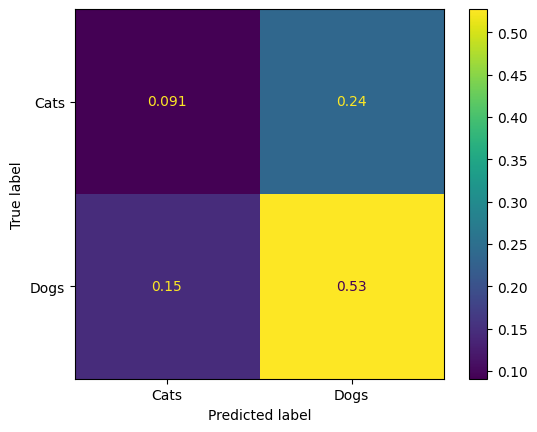

In [211]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred3, normalize='all')
cmd = ConfusionMatrixDisplay(cm, display_labels=['Cats','Dogs'])
cmd.plot()

# KNN classifier - Hyper Parameter Tuning

In [212]:
#KNN classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


# Define the parameter grid to search over
param_grid = {'n_neighbors': [5, 7, 13, 17, 23],
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan']}

# Create a KNeighborsClassifier object
knn = KNeighborsClassifier()

# Perform a grid search over the parameter grid using 5-fold cross-validation
grid_search_knn = GridSearchCV(knn, param_grid, cv=5)

# Fit the grid search object to the training data
#model_knn.fit(x_train, y_train)
grid_search_knn.fit(x_train, y_train)

# Print the best hyperparameters and their corresponding score
print("Best hyperparameters: ", grid_search_knn.best_params_)
print("Best score: ", grid_search_knn.best_score_)

joblib.dump(grid_search_knn,"output/Trained_Models/modelA_knn_tunned")

y_pred3 = grid_search_knn.predict(x_test)

print("KNN")
print("Train Accuracy:",grid_search_knn.score(x_train, y_train))
print("Test Accuracy:",grid_search_knn.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred3, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(y_test, y_pred3, pos_label='positive', average='micro'))
print("F1 Score: ",metrics.f1_score(y_test, y_pred3, pos_label='positive', average='micro'))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred3,))
print("ROC curve ",metrics.plot_roc_curve(grid_search_knn,x_test, y_test))

Best hyperparameters:  {'metric': 'manhattan', 'n_neighbors': 23, 'weights': 'uniform'}
Best score:  0.6318181818181818
KNN
Train Accuracy: 0.6681818181818182
Test Accuracy: 0.6181818181818182
Precision Score:  0.6181818181818182
Recall Score:  0.6181818181818182
F1 Score:  0.6181818181818182
Confusion Matrix: 
[[ 4 14]
 [ 7 30]]


AttributeError: module 'sklearn.metrics' has no attribute 'plot_roc_curve'

In [213]:
#### Ref: https://www.analyticsvidhya.com/blog/2018/03/introduction-k-neighbours-algorithm-clustering/

In [214]:
### https://towardsdatascience.com/9-distance-measures-in-data-science-918109d069fa

In [ ]:
### https://www.javatpoint.com/k-nearest-neighbor-algorithm-for-machine-learning

# Testing

## Extract features of the test image and reduce features using kmeans before predicting using knn

In [100]:
def siftFeatures(path):
    img = cv2.imread(path)
    gray = cv2.resize(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), (128, 128))

    #initialise sift descriptor
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(gray, None)

    #sift_image = cv2.drawKeypoints(gray, keypoints, img)
    #convert the descriptor array into a dataframe format
    return pd.DataFrame(descriptors).astype('uint8')

In [113]:
def featureReduction(features):
    modelKmeansA = joblib.load('output/Trained_Models/Kmeans_A')   #pickle.load(file)

    data = modelKmeansA.predict(features)
    hist = np.histogram(data,bins=3)

    return pd.DataFrame([hist[0]])

DOG


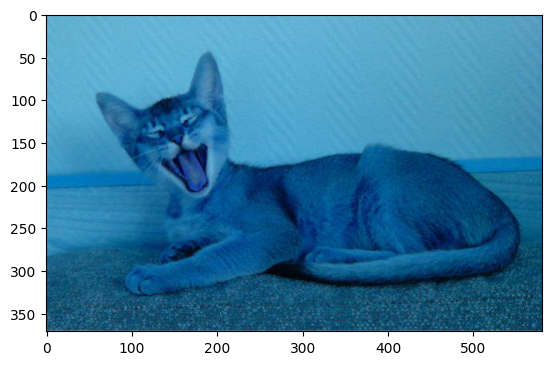

In [114]:
import joblib
import pickle
import glob
import seaborn as sns

img_path = r'D:\Datasets\catsDogs\val\cat\cat1.jpg'
modelA = joblib.load('output/Trained_Models/modelA_knn_tunned')
modelA_pred = modelA.predict(featureReduction(siftFeatures(img_path)))
modelA_proba = modelA.predict_proba(featureReduction(siftFeatures(img_path)))

print("CAT" if modelA_pred else "DOG")


img = cv2.imread(img_path)
plt.imshow(img)
plt.show()


In [115]:
modelA_proba

array([[0.60869565, 0.39130435]])

DOG


<function matplotlib.pyplot.show(close=None, block=None)>

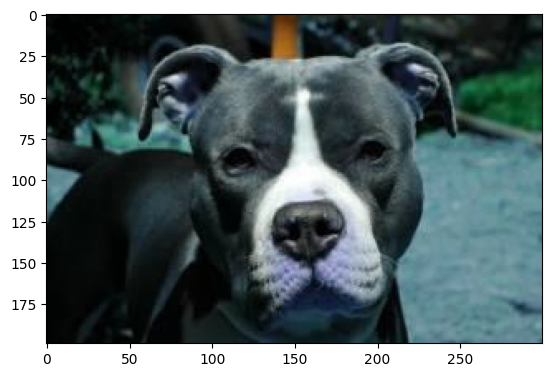

In [118]:
img_path = r'images\american_pit_bull_terrier_117_jpg.rf.f8a569795dac8749868594cc7280c429.jpg'
modelA = joblib.load('output/Trained_Models/modelA_knn_tunned')
modelA_pred = modelA.predict(featureReduction(siftFeatures(img_path)))
modelA_proba = modelA.predict_proba(featureReduction(siftFeatures(img_path)))

print("CAT" if modelA_pred else "DOG")

img_path = cv2.imread(img_path)
plt.imshow (img_path)
plt.show

In [119]:
modelA_proba

array([[0.65217391, 0.34782609]])

DOG


<function matplotlib.pyplot.show(close=None, block=None)>

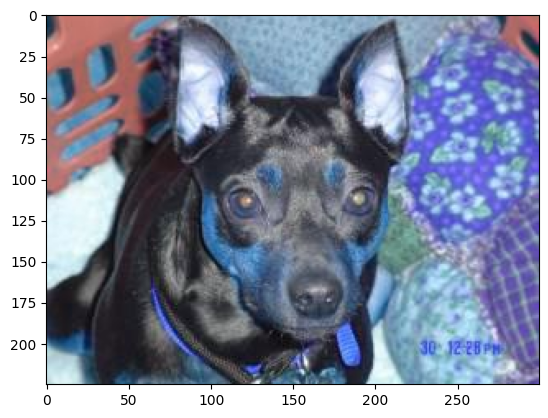

In [121]:
img_path = r'images\miniature_pinscher_178_jpg.rf.cc5dfb4cdc0886a89b0cb12f161185df.jpg'
modelA = joblib.load('output/Trained_Models/modelA_knn_tunned')
modelA_pred = modelA.predict(featureReduction(siftFeatures(img_path)))
modelA_proba = modelA.predict_proba(featureReduction(siftFeatures(img_path)))

print("CAT" if modelA_pred else "DOG")

img_path = cv2.imread(img_path)
plt.imshow (img_path)
plt.show

In [122]:
modelA_proba      

array([[0.65217391, 0.34782609]])

DOG


<function matplotlib.pyplot.show(close=None, block=None)>

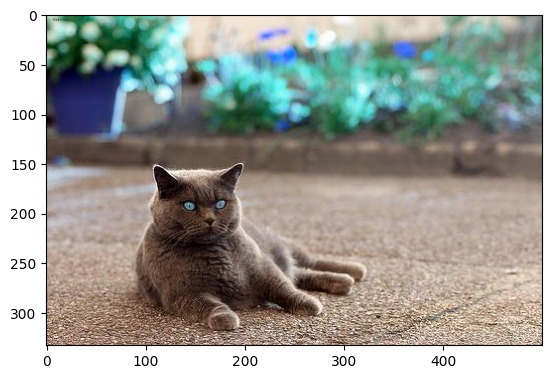

In [125]:
img_path = r'images\British_Shorthair_103_jpg.rf.ea9c679aa43c2bcc2dd74e51588f0c5e.jpg'
modelA = joblib.load('output/Trained_Models/modelA_knn_tunned')
modelA_pred = modelA.predict(featureReduction(siftFeatures(img_path)))
modelA_proba = modelA.predict_proba(featureReduction(siftFeatures(img_path)))

print("CAT" if modelA_pred else "DOG")

img_path = cv2.imread(img_path)
plt.imshow (img_path)
plt.show

In [158]:
modelA_proba

array([[0.6, 0.4]])

[0]
DOG


<function matplotlib.pyplot.show(close=None, block=None)>

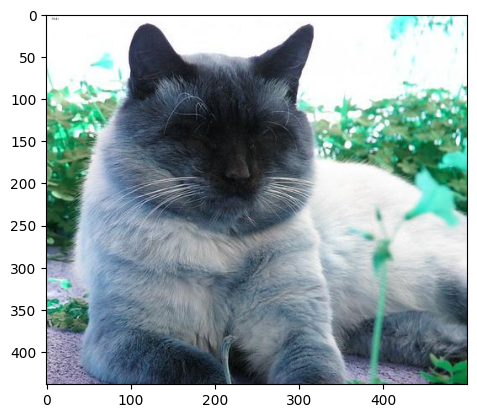

In [126]:
img_path = r'images\Siamese_142_jpg.rf.de98806682118bd0281fa974654644ed.jpg'
modelA = joblib.load('output/Trained_Models/modelA_knn_tunned')
modelA_pred = modelA.predict(featureReduction(siftFeatures(img_path)))
modelA_proba = modelA.predict_proba(featureReduction(siftFeatures(img_path)))

print(modelA_pred)
print("CAT" if modelA_pred else "DOG")

img_path = cv2.imread(img_path)
plt.imshow (img_path)
plt.show

In [160]:
modelA_proba

array([[1., 0.]])